<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek42.do.txt  -->
<!-- dom:TITLE: Exercises week 42 -->

# Exercises week 41
**October 9-13, 2023**

Date: **Deadline is Sunday October 22 at midnight**

You can hand in the exercises from week 41 and week 42 as one exercise and get a total score of two additional points.

# Overarching aims of the exercises this week

The aim of the exercises this week is to get started with implementing gradient methods of relevance for project 2. This exercise will also be continued next week with the addition of automatic differentation. Everything you develop here will be used in project 2.

In order to get started, we will now replace in our standard ordinary least squares (OLS) and Ridge regression codes (from project 1) the matrix inversion algorithm with our own gradient descent (GD) and SGD codes. You can use the Franke function or the terrain data from project 1. However, we recommend using a simpler function like $f(x)=a_0+a_1 x+a_2 x^2$ or higher-order one-dimensional polynomials. You can obviously test your final codes against for example the Franke function. Automatic differentiation will be discussed next week.

You should include in your analysis of the GD and SGD codes the following elements:

1. A plain gradient descent with a fixed learning rate (you will need to tune it) using the analytical expression of the gradients
2. Add momentum to the plain GD code and compare convergence with a fixed learning rate (you may need to tune the learning rate), again using the analytical expression of the gradients.
3. Repeat these steps for stochastic gradient descent with mini batches and a given number of epochs. Use a tunable learning rate as discussed in the lectures from week 39. Discuss the results as functions of the various parameters (size of batches, number of epochs etc)
4. Implement the Adagrad method in order to tune the learning rate. Do this with and without momentum for plain gradient descent and SGD.
5. Add RMSprop and Adam to your library of methods for tuning the learning rate.

The lecture notes from weeks 39 and 40 contain more information and code examples. Feel free to use these examples.

In summary, you should perform an analysis of the results for OLS and Ridge regression as function of the chosen learning rates, the number of mini-batches and epochs as well as algorithm for scaling the learning rate. You can also compare your own results with those that can be obtained using for example Scikit-Learn’s various SGD options. Discuss your results. For Ridge regression you need now to study the results as functions of the hyper-parameter $\lambda$ and the learning rate $\eta$. Discuss your results.

You will need your SGD code for the setup of the Neural Network and Logistic Regression codes. You will find the Python Seaborn package useful when plotting the results as function of the learning rate $\eta$ and the hyper-parameter $\lambda$ when you use Ridge regression.

We recommend reading chapter 8 on optimization from the textbook of Goodfellow, Bengio and Courville. This chapter contains many useful insights and discussions on the optimization part of machine learning.

# Solution 


#### Package import

In [ ]:
import autograd
import numpy as np
import autograd.numpy as auto_np
from autograd import grad
import matplotlib.pyplot as plt

# Gradient descent

### 1. A plain gradient descent with a fixed learning rate (you will need to tune it) using the analytical expression of the gradients

#### Support functions

In [184]:
# function to apply methods to
def function(x):
    return 1 + 5 * x + 5 * x**2

In [185]:
def analytical_gradient(x):
    return 5 + 2 * 5 * x 

In [311]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

In [263]:
def plotFunc(x, y, x_init=None, title=None):
    plt.plot(x, y, label=rf'$f(x)=1 + 5x + 5x^2 + \epsilon$')
    if x_init is not None:
        plt.plot(x_init, function(x_init), 'ro')
        
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    title = title if title is not None else 'Function'
    plt.title(title)

def plotPath(x_values_GD, y_values_GD, x_true, y_true, x_init):
    plotFunc(x_true, y_true, x_init, title='Function with gradient descent path')
    plt.plot(x_values_GD, y_values_GD, linestyle='--', marker='o', color='orange', label='Gradient descent path')
    plt.plot(x_values_GD[-1], y_values_GD[-1], 'ro', label='Final iteration')
    plt.legend()

Further we implement a basic version of gradient descent. With this we mean that we do not use any of the advanced methods like momentum, RMSprop or Adam. We will implement these later. For now we just want to get a basic understanding of how gradient descent works. We will also use the analytical gradient of the function. This is not something we will do later, but it is a good way to test our implementation. 

The gradient descent algorithm will be implemented to find the minimiaz of the cost functions. Here we use the MSE as the cost function and further assume that the MSE is described by function(x).

In [295]:
def gradient_descent(function, analytical_gradient, x_init, learning_rate=0.01, iterations=1000, tol=1e-4):
    
    # Initialize the first step
    x_k = x_init
    f_val_k = function(x_k)
    f_grad_k = -analytical_gradient(x_k) # negative gradient

    # Initialize lists to store values
    x_values_GD = [x_k]
    y_values_GD = [f_val_k]
    
    num_iter = 0
    for _ in range(iterations):
        # Calculate new x and y values
        x_k = x_k + learning_rate * f_grad_k
        f_val_k = function(x_k)
        f_grad_k = -analytical_gradient(x_k) # negative gradient to move towards minimum

        x_values_GD.append(x_k)
        y_values_GD.append(f_val_k)
        # Check if converged by checking gradient
        if np.abs(f_grad_k) <= tol:
            print(f'Converged after {num_iter} iterations.')
            break
        num_iter += 1
    
    # print results
    if num_iter == iterations:
        print(f'Gradient descent does not converge when max_iter={iterations} and tol={tol}.')
    else:
        print('Solution found:\n  y = {:.4f}\n  x = {:.4f}'.format(f_val_k, x_k))
        
    return x_values_GD, y_values_GD

#### Run and test code

Start by generating function values to train on and plot to know what we are working with

C:\Users\fjejo\AppData\Local\Temp\ipykernel_6612\4029592849.py:5: DeprecationWarning: This function is deprecated. Please call randint(-5, 5 + 1) instead
  y = [function(x) + np.random.random_integers(-5, 5)  for x in x]


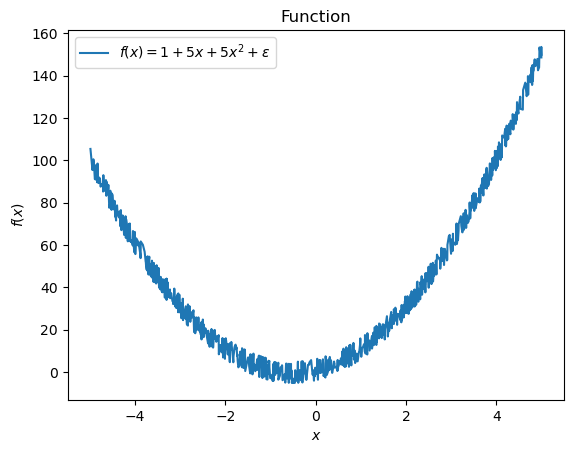

In [296]:
np.random.seed(2020)

n = 1000
x = np.sort(np.random.uniform(-5, 5, n))
y = [function(x) + np.random.random_integers(-5, 5)  for x in x]

plotFunc(x, y, x_init=None)

Now we try to find the bottom of the function using gradient descent. Let's try some learning rates and see what happens:

Converged after 59 iterations.
Solution found:
  y = -0.2500
  x = -0.5000


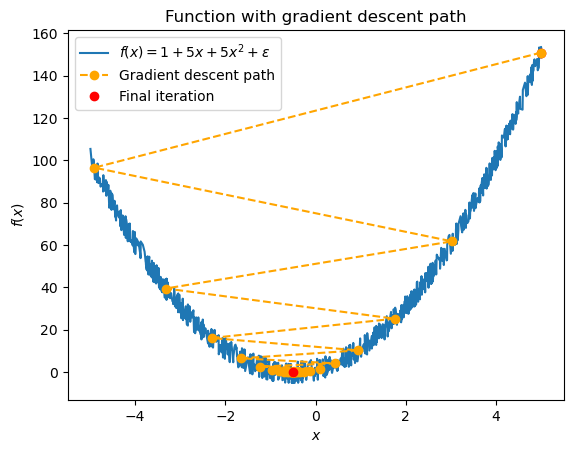

In [297]:
x_values_GD, y_values_GD = gradient_descent(function, analytical_gradient, x_init=5, learning_rate=.18, iterations=100)
plotPath(x_values_GD, y_values_GD, x, y, x_init=5)

With this learning rate we get convergence but it overshoots which may be risky. Lets try a smaller learning rate:

Gradient descent does not converge when max_iter=100 and tol=0.0001.


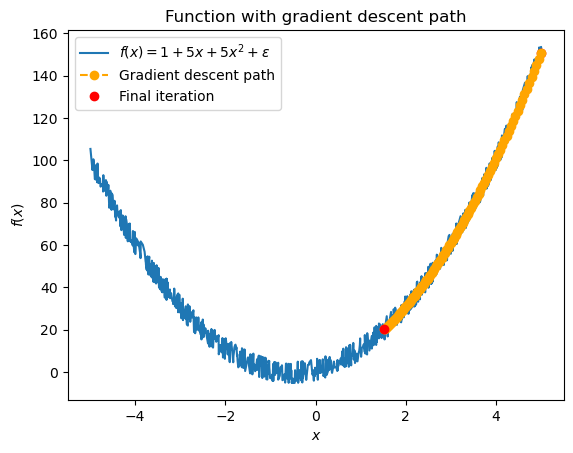

In [266]:
x_values_GD, y_values_GD = gradient_descent(function, analytical_gradient, x_init=5, learning_rate=.001, iterations=100)

plotPath(x_values_GD, y_values_GD, x, y, x_init=5)

with this learning rate we do not get convergence, the alg. times out. Lets try a learning rate in between:

Converged after 19 iterations.
Solution found:
  y = -0.2500
  x = -0.5000


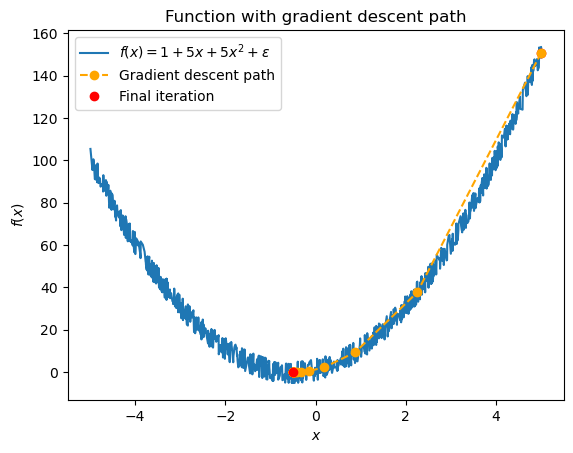

In [267]:
x_values_GD, y_values_GD = gradient_descent(function, analytical_gradient, x_init=5, learning_rate=.05, iterations=100)

plotPath(x_values_GD, y_values_GD, x, y, x_init=5)

We reach convergence fast with this learning rate.

### 2. Add momentum to the plain GD code and compare convergence with a fixed learning rate (you may need to tune the learning rate), again using the analytical expression of the gradients. 

Momentum is a technique used to accelerate the convergence of the gradient descent algorithm. It introduces a momentum term that accumulates the previous gradients and uses them to update the current step. This helps the algorithm to overcome local minima and converge faster.

In [281]:
def gradient_descent(function, analytical_gradient, 
                     x_init=0, learning_rate=0.01, iterations=1000, tol=1e-4, delta_momentum=None):
    
    # Initialize the first step
    x_k = x_init
    f_val_k = function(x_k)
    f_grad_k = -analytical_gradient(x_k) # negative gradient to move towards minimum

    # Initialize lists to store values
    x_values_GD = [x_k]
    y_values_GD = [f_val_k]
    
    # Initialize momentum
    if delta_momentum is not None:
        change = 0.0
        momentum = np.zeros_like(x_k)
  
    
    num_iter = 0
    for _ in range(iterations):
        # Calculate new x and y values
        if delta_momentum is not None:
            change = learning_rate * f_grad_k + delta_momentum * change
            momentum = delta_momentum * momentum + learning_rate * f_grad_k #v_i = delta(beta_i-beta_i-1) - lr g(beta_i)
            x_k = x_k + momentum # beta_i + 1 = beta_i + v_i, to be used in next iteration
        else:
            x_k = x_k + learning_rate * f_grad_k # to be used in next iteration
    
        f_val_k = function(x_k) # to be used in next iteration
        f_grad_k = -analytical_gradient(x_k) # to be used in next iteration

        x_values_GD.append(x_k)
        y_values_GD.append(f_val_k)
        # Check if converged by checking gradient
        if np.abs(f_grad_k) <= tol:
            print(f'Converged after {num_iter} iterations.')
            break
        num_iter += 1
    
    # print results
    if num_iter == iterations:
        print(f'Gradient descent does not converge when max_iter={iterations} and tol={tol}.')
    else:
        print('Solution found:\n  y = {:.4f}\n  x = {:.4f}'.format(f_val_k, x_k))
        
    return x_values_GD, y_values_GD

Using the same configurations as in 1. but adding the delta_momentum parameter we can set the momentum to 0.2 and see what happens:

Converged after 16 iterations.
Solution found:
  y = -0.2500
  x = -0.5000


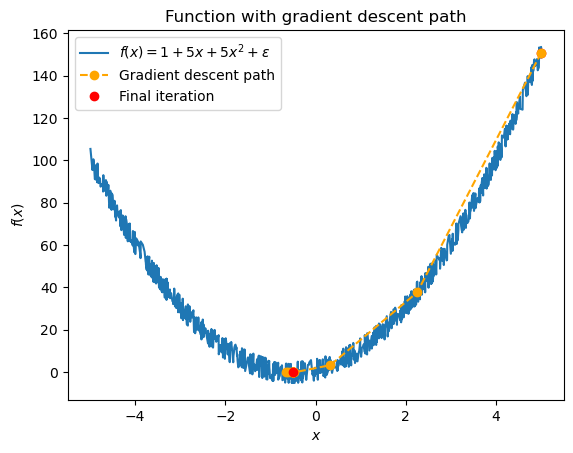

In [282]:
x_values_GD, y_values_GD = gradient_descent(function, analytical_gradient, 
                                            x_init=5, learning_rate=.05, iterations=100, delta_momentum=.2)

plotPath(x_values_GD, y_values_GD, x, y, x_init=5)


The number of iterations are reduced from 19 to 16 and indeed the alg. converges faster.

### A general gradient descent function 

In the above calculations we have are assuming the cost function of our predictions to follow function(x). In order to apply the alg. to a general dataset we need to agregate the cost function and its gradient from the dataset.    

In [596]:
def learning_schedule(method, learning_rate):
    if method == 'Fixed learning rate':
        return  learning_rate
    elif method == 'Time decay':
        return lambda learning_rate: 5 / (learning_rate + 50)
    elif method == 'Exponential decay':
        return lambda learning_rate: 0.1 * 0.1**(learning_rate / 50)
    else:
        raise ValueError('Invalid learning schedule')

In [597]:
def gradient_descent(X, y, 
                     cost_function, cost_gradient, 
                     method, 
                     method_learning_schedule, 
                     learning_rate=.01,  
                     max_iter=1000, tol=10e-4,
                     rho1=None, rho2=None,
                     delta_momentum=None):
    
    
    # Initialize the first step
    beta = np.random.randn(X.shape[1], 1) # random starting point
    
    if method == 'with momentum':
        change = 0.0
        change_beta = np.zeros_like(beta)
    if method == 'adam':
        rho1 = rho1 if rho1 is None else 0.9
        rho2 = rho2 if rho2 is None else 0.999
        m = np.zeros_like(beta)
        v = np.zeros_like(beta)
    if method == 'adagrad':
        sum_squares = np.zeros_like(beta)
    if method == 'rmsprop':
        sum_squares = np.zeros_like(beta)
        rho1 = rho1 if rho1 is None else 0.9

        

    # Initialize lists to store values
    beta_values_GD = []
    cost_scores = []
    
    
    num_iter = 0
    for _ in range(max_iter):
        # Calculate gradient
        gradient = cost_gradient(X, y, beta)
        # Update learning rate
        learning_rate = learning_schedule(method_learning_schedule, learning_rate)
        
        if method == 'without momentum':
            change_beta = gradient
        elif method == 'with momentum':
            change = learning_rate * gradient + delta_momentum * change
            change_beta = delta_momentum * change_beta + learning_rate * gradient #v_i = delta(beta_i-beta_i-1) - lr g(beta_i)
        elif method == 'adagrad':
            sum_squares += gradient**2
            change_beta = learning_rate * gradient / (np.sqrt(sum_squares) + 1e-8)
        elif method == 'adam':
            m = rho1 * m + (1 - rho1) * gradient
            v = rho2 * v + (1 - rho2) * gradient**2
            m_hat = m / (1 - rho1**(num_iter+1))
            v_hat = v / (1 - rho2**(num_iter+1))
            change_beta = learning_rate * m_hat / (np.sqrt(v_hat) + 1e-8)  
        elif method == 'rmsprop':
            sum_squares = rho1 * sum_squares + (1 - rho1) * gradient**2
            change_beta = learning_rate * gradient / (np.sqrt(sum_squares) + 1e-8)
        else:
            raise ValueError('Invalid method')

        
        beta -= learning_rate*change_beta # subtract because we want to move towards minimum
        beta_values_GD.append(beta)
        cost_score = cost_function(X, y, beta)
        cost_scores.append(cost_score)
        
        
        # Check if converged by checking gradient
        if np.linalg.norm(gradient) <= tol:
            print(f'Converged after {num_iter} iterations.')
            break
        num_iter += 1
    
    # print results
    if num_iter == max_iter:
        print(f'Gradient descent does not converge when max_iter={max_iter} and tol={tol}.')
    else:
        print(f'Solution found:\n  MSE = {cost_score[-1]}\n  beta = {beta}')
        
    return beta_values_GD, cost_scores 

Let us now try to perform an analysis. 
1. We start by generating a dataset and plotting it.
2. From the plot it is apperent that this might be approximated by a first order polynomial. We therefore generate a design matrix with two columns, one for the intercept and one for the datapoints.
3. We then run the gradient descent alg. on the dataset and plot the results.

Converged after 2108 iterations.
Solution found:
  MSE = [0.00928801]
  beta = [[3.91087442]
 [3.14959963]]


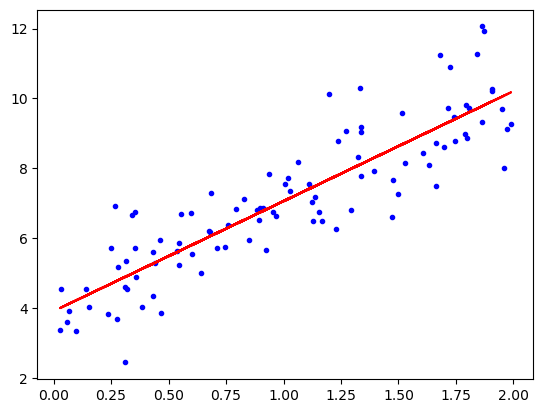

In [598]:
np.random.seed(2020)
# the number of datapoints
n = 100
x = 2*np.random.rand(n,1)
y = 4+3*x+np.random.randn(n,1)


# Generate design matrix
X = np.c_[np.ones_like(range(n)), x]

# Define cost function and gradient of cost function, These are for OLS
def cost_function(X, y, beta):
    n = np.shape(y)[0]
    return (1 / n) * (X @ beta - y)**2

def cost_gradient(X, y, beta):
    n = np.shape(y)[0]
    return (2 / n) * X.T @ ((X @ beta) - y)


beta_values_GD, cost_scores = gradient_descent(X, y, 
                                               cost_function, cost_gradient, 
                                               method='without momentum',
                                               method_learning_schedule='Fixed learning rate', 
                                               learning_rate=0.01,  
                                               max_iter=10000, tol=1e-3, 
                                               delta_momentum=None)
y_pred = X @ beta_values_GD[-1]

# Visualize the results
plt.plot(x, y, 'b.')
plt.plot(x, y_pred, 'r-')
plt.show()

However, as shown the convergence is quite slow with $\sim 2100$ iterations. We can speed this up by adding momentum. 

Iterating through some learning rates and adjusting the momentum parameter we reduce the number of iterations to $\sim 700$. using the same tolerance.

In [599]:
np.random.seed(2020)

learning_rates = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
for learning_rate in learning_rates:
    beta_values_GD, cost_scores = gradient_descent(X, y, 
                                                   cost_function, cost_gradient, 
                                                   method='with momentum',
                                                   method_learning_schedule='Fixed learning rate',learning_rate=learning_rate,  
                                                   max_iter=10000, tol=1e-3, 
                                                   delta_momentum=0.5)
    

#y_pred = X @ beta_values_GD[-1]
    

# Visualize the results
#plt.plot(x, y, 'b.')
#plt.plot(x, y_pred, 'r-')
#plt.show()

Gradient descent does not converge when max_iter=10000 and tol=0.001.
Gradient descent does not converge when max_iter=10000 and tol=0.001.
Gradient descent does not converge when max_iter=10000 and tol=0.001.
Gradient descent does not converge when max_iter=10000 and tol=0.001.
Converged after 730 iterations.
Solution found:
  MSE = [0.00928801]
  beta = [[3.91087633]
 [3.14959803]]


## 4. Implement the Adagrad method in order to tune the learning rate. Do this with and without momentum for plain gradient descent and SGD.

To implement adaptive gradient (adagrad) we just add an extra method to our gradient_descent function. Implemented using ouline from https://pytorch.org/docs/stable/generated/torch.optim.Adagrad.html

In [600]:
np.random.seed(2020)

beta_values_GD, cost_scores = gradient_descent(X, y, 
                                               cost_function, cost_gradient, 
                                               method='adagrad',
                                               method_learning_schedule='Fixed learning rate', 
                                               learning_rate=3,  
                                               max_iter=10000, tol=1e-3)

Converged after 65 iterations.
Solution found:
  MSE = [0.00928602]
  beta = [[3.91125952]
 [3.14929937]]


## 5. Add RMSprop and Adam to your library of methods for tuning the learning rate.

The iterations are sign. reduced with the adam implementation. Implementation adapted from https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc.

In [601]:
np.random.seed(2020)
beta_values_GD, cost_scores = gradient_descent(X, y, 
                                               cost_function, cost_gradient, 
                                               method='adam',
                                               method_learning_schedule='Fixed learning rate', 
                                               learning_rate=1,  
                                               max_iter=10000, tol=1e-3, 
                                               rho1=0.9, rho2=0.999)

Converged after 122 iterations.
Solution found:
  MSE = [0.00919478]
  beta = [[3.91495774]
 [3.15041636]]


In [603]:
np.random.seed(2020)
beta_values_GD, cost_scores = gradient_descent(X, y,
                                               cost_function, cost_gradient, 
                                               method='rmsprop',
                                               method_learning_schedule='Fixed learning rate', 
                                               learning_rate=1,  
                                               max_iter=10000, tol=1e-3, 
                                               rho1=0.9)

Converged after 38 iterations.
Solution found:
  MSE = [0.00928254]
  beta = [[3.91216814]
 [3.14852262]]


## Add automatic differentiation

Will prove consept by checking the gradient of a the cost funtion with compairing the analytical gradient with the gradient calculated by automatic differentiation.
1. again we generate the dummy set. 

In [610]:
from autograd import grad

ModuleNotFoundError: No module named 'autograd'

In [608]:
def gradient_descent_AD(X, y, 
                        cost_function,  
                        method, 
                        method_learning_schedule, 
                        learning_rate=.01,  
                        max_iter=1000, tol=10e-4,
                        rho1=None, rho2=None,
                        delta_momentum=None):
    
    cost_gradient = grad(cost_function)
    
    # Initialize the first step
    beta = np.random.randn(X.shape[1], 1) # random starting point
    
    if method == 'with momentum':
        change = 0.0
        change_beta = jnp.zeros_like(beta)
    if method == 'adam':
        rho1 = rho1 if rho1 is None else 0.9
        rho2 = rho2 if rho2 is None else 0.999
        m = jnp.zeros_like(beta)
        v = jnp.zeros_like(beta)
    if method == 'adagrad':
        sum_squares = jnp.zeros_like(beta)
    if method == 'rmsprop':
        sum_squares = jnp.zeros_like(beta)
        rho1 = rho1 if rho1 is None else 0.9

        

    # Initialize lists to store values
    beta_values_GD = []
    cost_scores = []
    
    
    num_iter = 0
    for _ in range(max_iter):
        # Calculate gradient
        gradient = cost_gradient(X, y, beta)
        # Update learning rate
        learning_rate = learning_schedule(method_learning_schedule, learning_rate)
        
        if method == 'without momentum':
            change_beta = gradient
        elif method == 'with momentum':
            change = learning_rate * gradient + delta_momentum * change
            change_beta = delta_momentum * change_beta + learning_rate * gradient #v_i = delta(beta_i-beta_i-1) - lr g(beta_i)
        elif method == 'adagrad':
            sum_squares += gradient**2
            change_beta = learning_rate * gradient / (np.sqrt(sum_squares) + 1e-8)
        elif method == 'adam':
            m = rho1 * m + (1 - rho1) * gradient
            v = rho2 * v + (1 - rho2) * gradient**2
            m_hat = m / (1 - rho1**(num_iter+1))
            v_hat = v / (1 - rho2**(num_iter+1))
            change_beta = learning_rate * m_hat / (np.sqrt(v_hat) + 1e-8)  
        elif method == 'rmsprop':
            sum_squares = rho1 * sum_squares + (1 - rho1) * gradient**2
            change_beta = learning_rate * gradient / (jnp.sqrt(sum_squares) + 1e-8)
        else:
            raise ValueError('Invalid method')

        
        beta -= learning_rate*change_beta # subtract because we want to move towards minimum
        beta_values_GD.append(beta)
        cost_score = cost_function(X, y, beta)
        cost_scores.append(cost_score)
        
        
        # Check if converged by checking gradient
        if np.linalg.norm(gradient) <= tol:
            print(f'Converged after {num_iter} iterations.')
            break
        num_iter += 1
    
    # print results
    if num_iter == max_iter:
        print(f'Gradient descent does not converge when max_iter={max_iter} and tol={tol}.')
    else:
        print(f'Solution found:\n  MSE = {cost_score[-1]}\n  beta = {beta}')
        
    return beta_values_GD, cost_scores 

result using analytic cost gradient function


C:\Users\fjejo\AppData\Local\Temp\ipykernel_6612\3708371076.py:14: RuntimeWarning: overflow encountered in square
  return (1 / n) * (X @ beta - y)**2
C:\Users\fjejo\AppData\Local\Temp\ipykernel_6612\3708371076.py:14: RuntimeWarning: overflow encountered in matmul
  return (1 / n) * (X @ beta - y)**2
C:\Users\fjejo\AppData\Local\Temp\ipykernel_6612\3708371076.py:18: RuntimeWarning: overflow encountered in matmul
  return (2 / n) * X.T @ ((X @ beta) - y)
C:\Users\fjejo\AppData\Local\Temp\ipykernel_6612\168417853.py:63: RuntimeWarning: invalid value encountered in subtract
  beta -= learning_rate*change_beta # subtract because we want to move towards minimum


Gradient descent does not converge when max_iter=10000 and tol=0.001.


NameError: name 'grad' is not defined

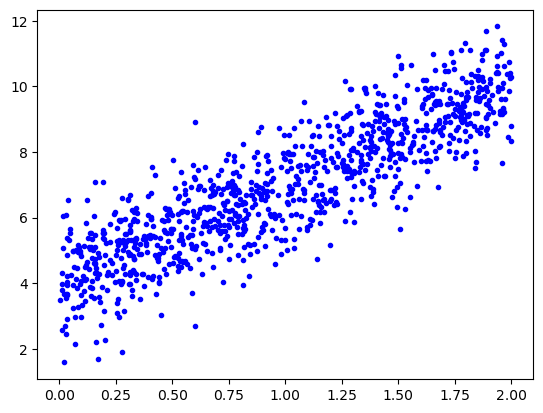

In [609]:
n = 1000
x = 2*np.random.rand(n,1)
X = np.c_[np.ones((n,1)), x]
y = 4+3*x+np.random.randn(n,1)

plt.plot(x, y, 'b.')


np.random.seed(2020)
 
print('result using analytic cost gradient function')
beta_values_GD, cost_scores = gradient_descent(X, y, 
                                               cost_function, cost_gradient, 
                                               method='without momentum',
                                               method_learning_schedule='Fixed learning rate', 
                                               learning_rate=1,  
                                               max_iter=10000, tol=1e-3, 
                                               rho1=0.9, rho2=0.999)

beta_values_GD, cost_scores = gradient_descent_AD(X, y, 
                                               cost_function, 
                                               method='without momentum',
                                               method_learning_schedule='Fixed learning rate', 
                                               learning_rate=1,  
                                               max_iter=10000, tol=1e-3, 
                                               rho1=0.9, rho2=0.999)


### 3. Repeat these steps for stochastic gradient descent with mini batches and a given number of epochs. Use a tunable learning rate as discussed in the lectures from week 39. Discuss the results as functions of the various parameters (size of batches, number of epochs etc)

We need to alter the alg. from gradient descent to stochastic gradient descent. This is done by adding a batch size and a number of epochs to iterate through. The batch size is the number of samples we use to calculate the gradient. The number of epochs is the number of times we run through the entire dataset.

#### Support functions

Assuming this data can be approximated by a first order polynomial we can generate a desing matrix in order to perform the regression.

In [305]:
X = np.c_[np.ones((n,1)), x]

Was not able to do the implementation... something was wrong with the iterative scheme so scretched it. and start again...

0.1
0.09803921568627451
0.09615384615384616
0.09433962264150944
0.09259259259259259
0.09090909090909091
0.08928571428571429
0.08771929824561403
0.08620689655172414
0.0847457627118644
0.08333333333333333
0.08196721311475409
0.08064516129032258
0.07936507936507936
0.078125
0.07692307692307693
0.07575757575757576
0.07462686567164178
0.07352941176470588
0.07246376811594203
0.07142857142857142
0.07042253521126761
0.06944444444444445
0.0684931506849315
0.06756756756756757
0.06666666666666667
0.06578947368421052
0.06493506493506493
0.0641025641025641
0.06329113924050633
0.0625
0.06172839506172839
0.06097560975609756
0.060240963855421686
0.05952380952380952
0.058823529411764705
0.05813953488372093
0.05747126436781609
0.056818181818181816
0.056179775280898875
0.05555555555555555
0.054945054945054944
0.05434782608695652
0.053763440860215055
0.05319148936170213
0.05263157894736842
0.052083333333333336
0.05154639175257732
0.05102040816326531
0.050505050505050504
0.05
0.04950495049504951
0.04901960

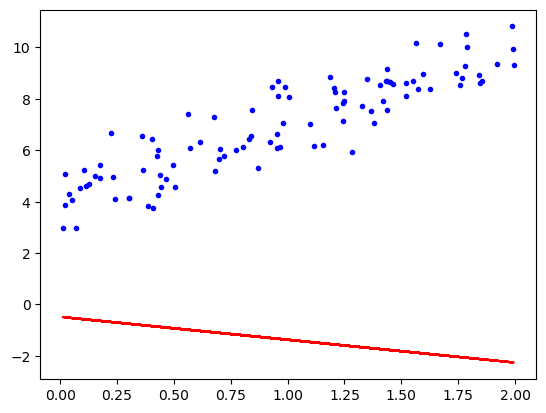

In [371]:
beta_values_GD, MSE_scores = stochastic_gradient_descent(X, y, minibatch_size=10, n_epochs=10)

best_performance = np.argmin(MSE_scores)
best_betas = beta_values_GD[best_performance]

y_pred = X @ best_betas
plt.plot(x, y, 'b.')
plt.plot(x, y_pred, 'r-')

In order to visualize we now have 